Organising dataset into train, test and val


In [2]:

import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define the dataset directory and where you want to move the images
dataset_path = r'Dataset\JPEGImages'
output_path = r'Dataset\Modified_dataset'

# Get all image filenames in the directory
image_files = os.listdir(dataset_path)

# Extract the class information from the filename (e.g., class 2 from "IP002000038")
def get_class_from_filename(filename):
    # Example: "IP002000038" -> class 2
    return int(filename[2:5])  

# Create class directories under the train, val, and test folders
train_dir = os.path.join(output_path, 'train')
val_dir = os.path.join(output_path, 'val')
test_dir = os.path.join(output_path, 'test')

# Create directories for each class
classes = set(get_class_from_filename(filename) for filename in image_files)
for class_id in classes:
    os.makedirs(os.path.join(train_dir, str(class_id)), exist_ok=True)
    os.makedirs(os.path.join(val_dir, str(class_id)), exist_ok=True)
    os.makedirs(os.path.join(test_dir, str(class_id)), exist_ok=True)

# Shuffle images and split into train, validation, and test sets
train_files, temp_files = train_test_split(image_files, test_size=0.2, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

# Helper function to move files to corresponding class folder
def move_files(file_list, target_dir):
    for file in file_list:
        class_id = get_class_from_filename(file)
        src = os.path.join(dataset_path, file)
        dest = os.path.join(target_dir, str(class_id), file)
        shutil.move(src, dest)

# Move files to the corresponding directories
move_files(train_files, train_dir)
move_files(val_files, val_dir)
move_files(test_files, test_dir)

print("Dataset has been organized and split into train, validation, and test sets.")


Dataset has been organized and split into train, validation, and test sets.


In [3]:
from PIL import Image
import os
from collections import Counter

dataset_path = r'Dataset\Modified_dataset'

# Function to check the most common image size across all subsets (train, val, and test)
def check_most_common_image_size(dataset_path):
    # List to store the sizes of all images
    image_sizes = []
    
    # Iterate over train, val, and test subfolders
    for subset in ['train', 'val', 'test']:
        subset_path = os.path.join(dataset_path, subset)
        
        # Walk through each class folder inside the subset folder
        for class_folder in os.listdir(subset_path):
            class_folder_path = os.path.join(subset_path, class_folder)
            
            if os.path.isdir(class_folder_path):
                # List all image files in the class folder
                image_files = os.listdir(class_folder_path)
                
                for file in image_files:
                    img_path = os.path.join(class_folder_path, file)
                    
                    # Open the image and store its size
                    try:
                        with Image.open(img_path) as img:
                            image_sizes.append(img.size)
                    except Exception as e:
                        print(f"Error opening image {file}: {e}")
    
    # Count occurrences of each image size
    size_counts = Counter(image_sizes)
    
    # Find the most common image size and its count
    if image_sizes:  # Only proceed if there are images in the list
        most_common_size, count = size_counts.most_common(1)[0]
        print(f"Most common image size across all datasets: {most_common_size}, Count: {count}")
    else:
        print("No images found in the dataset.")

# Check the most common image size across all datasets (train, val, and test)
check_most_common_image_size(dataset_path)


Most common image size across all datasets: (800, 600), Count: 398


As the size of all images are different, we need to resize them to a common size

In [4]:
from PIL import Image
import os

def resize_images_in_directory(directory, target_size=(224, 224)):
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                try:
                    # Open image
                    with Image.open(file_path) as img:
                        # Resize image to 224x224
                        img_resized = img.resize(target_size)
                        img_resized.save(file_path)  # Save resized image
                except Exception as e:
                    print(f"Error processing image {file_name}: {e}")

# Apply resizing to train, val, and test directories
dataset_path = r'Dataset\Modified_dataset'
for subset in ['train', 'val', 'test']:
    subset_path = os.path.join(dataset_path, subset)
    resize_images_in_directory(subset_path)

print("Resizing complete.")


Resizing complete.


Checking size

In [5]:
import os
from PIL import Image

# Function to check if the image size is 224x224
def check_image_size(dataset_path):
    image_files = os.listdir(dataset_path)
    
    # Initialize a flag to track if all images are 224x224
    all_correct_size = True
    
    # Check if each image size is 224x224
    for file in image_files:
        if file.endswith('.jpg'):  # Only check jpg files
            img_path = os.path.join(dataset_path, file)
            with Image.open(img_path) as img:
                if img.size != (224, 224):
                    print(f"Image '{file}' has size {img.size}. Expected size: (224, 224).")
                    all_correct_size = False  # Set the flag to False if any image has a wrong size
    
    # Print a message indicating if all images were the correct size
    if all_correct_size:
        print(f"All images in '{dataset_path}' are of size (224, 224).")
    else:
        print(f"Some images in '{dataset_path}' are not of size (224, 224).")

# Check images in the train, val, and test directories
train_path = 'Dataset/Modified_dataset/train'
val_path = 'Dataset/Modified_dataset/val'
test_path = 'Dataset/Modified_dataset/test'

print("Checking images in train set:")
check_image_size(train_path)

print("\nChecking images in val set:")
check_image_size(val_path)

print("\nChecking images in test set:")
check_image_size(test_path)

print("\nSize check complete.")


Checking images in train set:
All images in 'Dataset/Modified_dataset/train' are of size (224, 224).

Checking images in val set:
All images in 'Dataset/Modified_dataset/val' are of size (224, 224).

Checking images in test set:
All images in 'Dataset/Modified_dataset/test' are of size (224, 224).

Size check complete.


Normalizing pixel values to [0,1] and one hot encoding

In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# from PIL import Image
# from tensorflow.keras.preprocessing.image import img_to_array

# # Extract the class information from the filename (e.g., class 2 from "IP002000038")
# def get_class_from_filename(filename):
#     # Assuming the filename format is something like "IP002000038", where class_id is in the 3rd to 5th character
#     class_id = int(filename[2:5])  # Extract the class ID (adjust the indices based on your filename format)
#     return class_id  # No need to subtract 1 since class IDs range from 0 to 102

# # Function to process image and label
# def process_image_and_label(img_path, class_id, num_classes=103):
#     # Open the image (assumed resized already)
#     with Image.open(img_path) as img:
#         # Convert the image to a numpy array and normalize to [0, 1]
#         img_array = img_to_array(img) / 255.0
    
#     # Perform one-hot encoding for the label
#     one_hot_label = to_categorical(class_id, num_classes=num_classes)
    
#     return img_array, one_hot_label

# # Function to process all images and labels in the dataset folder in batches
# def process_images_and_labels(dataset_path, batch_size=32, num_classes=103):
#     images = []
#     labels = []
    
#     # Iterate over all files in the dataset folder
#     for class_id in os.listdir(dataset_path):
#         class_folder = os.path.join(dataset_path, class_id)
        
#         if os.path.isdir(class_folder):
#             for file_name in os.listdir(class_folder):
#                 if file_name.endswith('.jpg'):  # Only process jpg files
#                     img_path = os.path.join(class_folder, file_name)
                    
#                     # Get the class ID from the filename
#                     class_id_int = get_class_from_filename(file_name)
                    
#                     # Process the image and label
#                     img, label = process_image_and_label(img_path, class_id_int, num_classes)
                    
#                     images.append(img)
#                     labels.append(label)
                    
#                     # If the batch size is reached, yield the batch and reset
#                     if len(images) == batch_size:
#                         yield np.array(images), np.array(labels)
#                         images = []  # Reset images list for the next batch
#                         labels = []  # Reset labels list for the next batch

#     # If any images are left that are less than the batch size, return them
#     if images:
#         yield np.array(images), np.array(labels)

# # Example usage to process and print images in batches
# train_path = 'Dataset/Modified_dataset/train'

# # Process images in batches and print the batch shape
# for batch_images, batch_labels in process_images_and_labels(train_path, batch_size=32):
#     print(f"Batch images shape: {batch_images.shape}, Batch labels shape: {batch_labels.shape}")
#     # You can process the batch here (e.g., train a model, etc.)
#     break  # Just process one batch for demonstration purposes


Batch images shape: (32, 224, 224, 3), Batch labels shape: (32, 103)


Check class imbalance


Class Distribution in the Train Set:
Class 0: 136 images
Class 1: 96 images
Class 10: 116 images
Class 100: 114 images
Class 101: 52 images
Class 102: 2357 images
Class 11: 93 images
Class 12: 15 images
Class 13: 32 images
Class 14: 353 images
Class 15: 695 images
Class 16: 346 images
Class 17: 37 images
Class 18: 239 images
Class 19: 126 images
Class 2: 21 images
Class 20: 149 images
Class 21: 135 images
Class 22: 333 images
Class 23: 156 images
Class 24: 710 images
Class 25: 167 images
Class 26: 188 images
Class 27: 106 images
Class 28: 19 images
Class 29: 52 images
Class 3: 124 images
Class 30: 22 images
Class 32: 57 images
Class 33: 39 images
Class 34: 74 images
Class 35: 110 images
Class 36: 21 images
Class 37: 27 images
Class 38: 281 images
Class 39: 202 images
Class 4: 69 images
Class 40: 344 images
Class 41: 52 images
Class 42: 77 images
Class 43: 106 images
Class 44: 65 images
Class 45: 59 images
Class 46: 332 images
Class 47: 175 images
Class 48: 273 images
Class 49: 430 imag

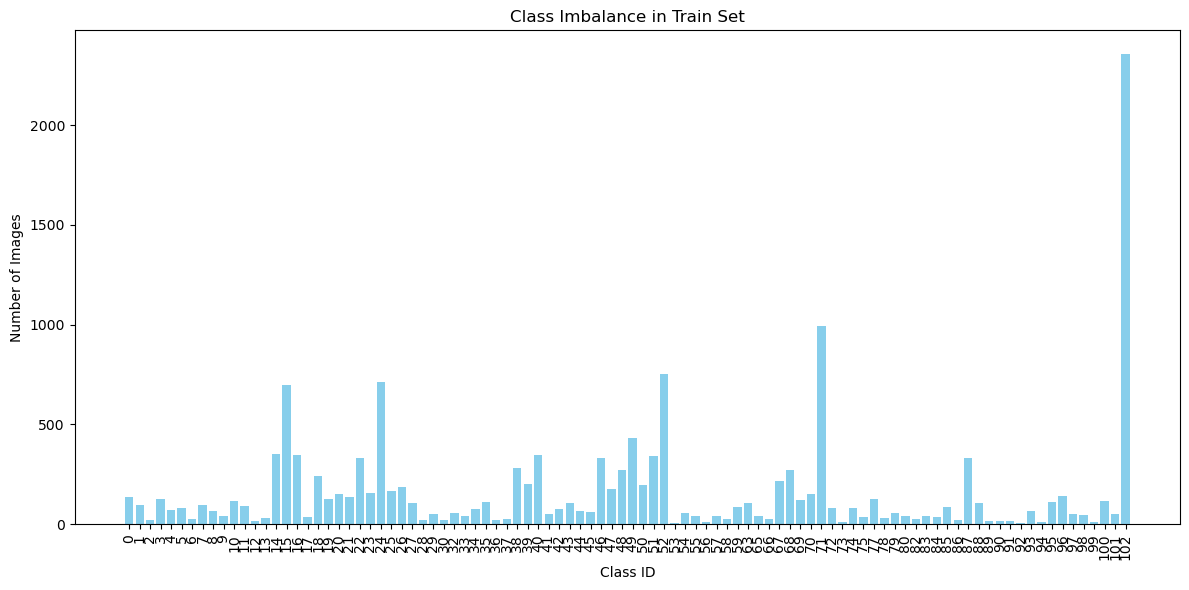

In [9]:
import os
import matplotlib.pyplot as plt

def check_class_imbalance(dataset_path):
    class_counts = {}

    for class_id in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_id)
        if os.path.isdir(class_dir):
            image_count = len([f for f in os.listdir(class_dir) if f.endswith('.jpg')])
            class_counts[class_id] = image_count

    print("Class Distribution in the Train Set:")
    for class_id, count in class_counts.items():
        print(f"Class {class_id}: {count} images")

    # 🔴 Print classes with 0 images
    empty_classes = [class_id for class_id, count in class_counts.items() if count == 0]
    if empty_classes:
        print("\n❌ Classes with 0 images:")
        for class_id in empty_classes:
            print(f"Class {class_id}")
    else:
        print("\n✅ All classes have at least one image.")

    # Plotting
    sorted_class_ids = sorted(class_counts.keys(), key=int)
    sorted_counts = [class_counts[class_id] for class_id in sorted_class_ids]

    plt.figure(figsize=(12, 6))
    plt.bar(sorted_class_ids, sorted_counts, color='skyblue')
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Class ID')
    plt.ylabel('Number of Images')
    plt.title('Class Imbalance in Train Set')
    plt.tight_layout()
    plt.show()

# Example usage
train_path = 'Dataset/Modified_dataset/train'
check_class_imbalance(train_path)


Performing data augmentation, threshold is 700

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Define the fixed threshold
FIXED_THRESHOLD = 700  # Set threshold to 700

def get_class_sizes(dataset_path):
    class_sizes = {}
    for class_id in range(103):  # Iterate over all class IDs from 0 to 102
        class_folder = str(class_id)  # Folder name as class_id (0 to 102)
        class_folder_path = os.path.join(dataset_path, class_folder)
        
        # Check if the class folder exists
        if os.path.isdir(class_folder_path):
            class_sizes[class_folder] = len([f for f in os.listdir(class_folder_path) if f.endswith('.jpg')])
        else:
            print(f"Class folder {class_folder} is missing, skipping augmentation.")
    return class_sizes

def augment_class_images(class_folder_path, target_class_size):
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    images = []
    for file_name in os.listdir(class_folder_path):
        if file_name.endswith('.jpg'):
            img_path = os.path.join(class_folder_path, file_name)
            try:
                with Image.open(img_path) as img:
                    img = img.convert("RGB")
                    images.append(img)
            except Exception as e:
                print(f"Error opening image {file_name}: {e}")
    
    augmented_dir = os.path.join(class_folder_path, "augmented")
    if not os.path.exists(augmented_dir):
        os.makedirs(augmented_dir)

    # Add the original images first to augmented folder
    for i, img in enumerate(images):
        img.save(os.path.join(augmented_dir, f"orig_{i}.jpg"))

    if len(images) < target_class_size:
        num_to_generate = target_class_size - len(images)
        generated_count = 0
        
        # Continue generating until we reach the target
        while generated_count < num_to_generate:
            # Cycle through all images for augmentation
            for i, img in enumerate(images):
                if generated_count >= num_to_generate:
                    break
                    
                img_array = np.array(img)
                img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for data augmentation

                # Generate one augmented image from this image
                for batch in datagen.flow(img_array, batch_size=1, 
                                        save_to_dir=augmented_dir, 
                                        save_prefix=f'aug_{i}_', 
                                        save_format='jpeg'):
                    generated_count += 1
                    break  # Only generate one per image per cycle

def perform_data_augmentation(dataset_path):
    class_sizes = get_class_sizes(dataset_path)

    print(f"\nFixed threshold set to: {FIXED_THRESHOLD} images\n")

    for class_folder in range(103):  # Iterate through class IDs 0 to 102
        class_folder_str = str(class_folder)
        class_folder_path = os.path.join(dataset_path, class_folder_str)
        
        # Check if the class folder exists in the dataset
        if class_folder_str not in class_sizes:
            continue  # Skip if folder doesn't exist
        
        current_class_size = class_sizes[class_folder_str]
        
        if current_class_size < FIXED_THRESHOLD:
            print(f"Augmenting class {class_folder_str} from {current_class_size} to {FIXED_THRESHOLD} images.")
            augment_class_images(class_folder_path, FIXED_THRESHOLD)
        else:
            print(f"Class {class_folder_str} already has {current_class_size} images, no augmentation needed.")

# Example usage
dataset_path = r'Dataset/Modified_dataset/train'
perform_data_augmentation(dataset_path)

Class folder 31 is missing, skipping augmentation.
Class folder 60 is missing, skipping augmentation.
Class folder 61 is missing, skipping augmentation.
Class folder 62 is missing, skipping augmentation.
Class folder 64 is missing, skipping augmentation.
Class folder 76 is missing, skipping augmentation.
Class folder 81 is missing, skipping augmentation.

Fixed threshold set to: 700 images

Augmenting class 0 from 136 to 700 images.
Augmenting class 1 from 96 to 700 images.
Augmenting class 2 from 21 to 700 images.
Augmenting class 3 from 124 to 700 images.
Augmenting class 4 from 69 to 700 images.
Augmenting class 5 from 81 to 700 images.
Augmenting class 6 from 24 to 700 images.
Augmenting class 7 from 95 to 700 images.
Augmenting class 8 from 66 to 700 images.
Augmenting class 9 from 43 to 700 images.
Augmenting class 10 from 116 to 700 images.
Augmenting class 11 from 93 to 700 images.
Augmenting class 12 from 15 to 700 images.
Augmenting class 13 from 32 to 700 images.
Augmenting 

Plotting number of augmented images for conforming class balance

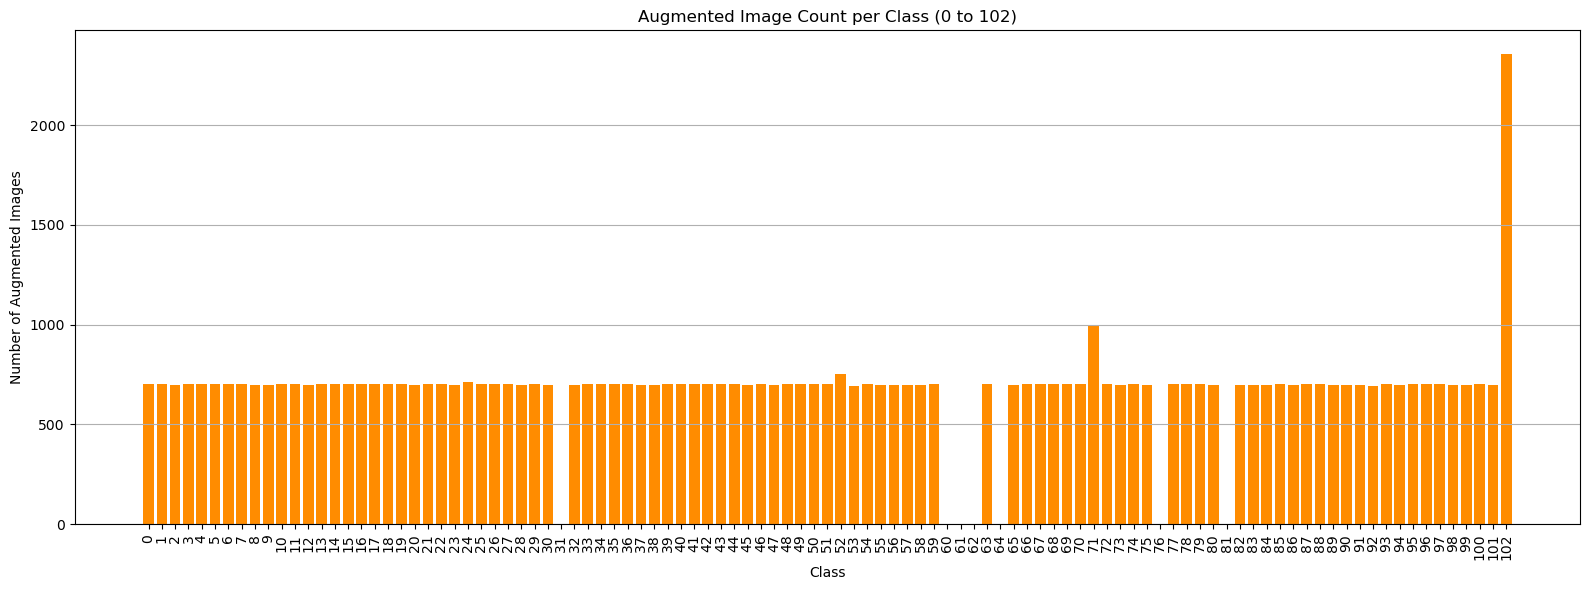

In [5]:
import os
import matplotlib.pyplot as plt

def plot_augmented_image_distribution(dataset_path):
    class_counts = {}

    for class_id in range(0, 103):  # From 0 to 102 inclusive
        class_folder = str(class_id)
        augmented_path = os.path.join(dataset_path, class_folder, "augmented")

        if os.path.exists(augmented_path):
            total_images = len([
                f for f in os.listdir(augmented_path)
                if f.endswith('.jpeg') or f.endswith('.jpg')
            ])
            class_counts[class_folder] = total_images
        else:
            class_counts[class_folder] = 0

    # Plotting
    classes = sorted(class_counts.keys(), key=lambda x: int(x))
    counts = [class_counts[cls] for cls in classes]

    plt.figure(figsize=(16, 6))
    plt.bar(classes, counts, color='darkorange')
    plt.xlabel("Class")
    plt.ylabel("Number of Augmented Images")
    plt.title("Augmented Image Count per Class (0 to 102)")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example usage
dataset_path = r'Dataset/Modified_dataset/train'
plot_augmented_image_distribution(dataset_path)


In [4]:
import os

def check_missing_augmented_folders(dataset_path):
    """Check and print class folders missing an 'augmented' subfolder."""
    missing_augmented = []
    
    for class_id in range(103):  # Assuming classes 0-102
        class_folder = os.path.join(dataset_path, str(class_id))
        
        if not os.path.exists(class_folder):
            continue  # Skip missing class folders
        
        augmented_dir = os.path.join(class_folder, "augmented")
        if not os.path.exists(augmented_dir):
            missing_augmented.append(str(class_id))
    
    if missing_augmented:
        print("Folders missing 'augmented' subfolder:")
        print(", ".join(missing_augmented))
    else:
        print("All class folders have an 'augmented' subfolder!")

# Example usage
dataset_path = r'Dataset/Modified_dataset/train'  # Change to your dataset path
check_missing_augmented_folders(dataset_path)

All class folders have an 'augmented' subfolder!


Training model for 5 epochs

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Directory paths for training, validation, and test datasets
train_dir = r'Dataset/Modified_dataset/train'
val_dir = r'Dataset/Modified_dataset/val'
test_dir = r'Dataset/Modified_dataset/test'

# Image data generators for loading images (only rescaling)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescaling for training data
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training, validation, and test datasets
train_generator = train_datagen.flow_from_directory(
    os.path.join(train_dir),  # Load from the 'train' directory
    target_size=(150, 150),  # Reduced image size to 150x150
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),  # Reduced image size to 150x150
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Reduced image size to 150x150
    batch_size=32,
    class_mode='categorical'
)

# Load VGG16 model pre-trained on ImageNet, without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Unfreeze some of the layers in VGG16 for fine-tuning
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True  # Unfreeze the last 4 layers of VGG16

# Build the model
model = Sequential()
model.add(base_model)  # Add the VGG16 base model
model.add(Flatten())  # Flatten the output from the base model
model.add(Dense(1024, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1024, activation='relu'))  # Another Dense layer
model.add(Dropout(0.5))  # Another dropout for regularization
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Output layer with softmax

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Start with 5 epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping, reduce_lr]  # Use callbacks for early stopping and LR reduction
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.4f}')


Found 84342 images belonging to 96 classes.
Found 1897 images belonging to 96 classes.
Found 1898 images belonging to 96 classes.
Epoch 1/5


c:\Users\karti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4228s 2s/step - accuracy: 0.1688 - loss: 3.6651 - val_accuracy: 0.5207 - val_loss: 1.6434 - learning_rate: 1.0000e-04
Epoch 2/5
   1/2635 ━━━━━━━━━━━━━━━━━━━━ 56:37 1s/step - accuracy: 0.4062 - loss: 1.6546

c:\Users\karti\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 66s 25ms/step - accuracy: 0.4062 - loss: 1.6546 - val_accuracy: 0.5222 - val_loss: 1.6428 - learning_rate: 1.0000e-04
Epoch 3/5
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3238s 1s/step - accuracy: 0.5872 - loss: 1.3501 - val_accuracy: 0.5678 - val_loss: 1.5642 - learning_rate: 1.0000e-04
Epoch 4/5
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 0.7500 - loss: 0.6717 - val_accuracy: 0.5736 - val_loss: 1.5464 - learning_rate: 1.0000e-04
Epoch 5/5
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3054s 1s/step - accuracy: 0.7525 - loss: 0.7499 - val_accuracy: 0.6006 - val_loss: 1.7241 - learning_rate: 1.0000e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 58s 989ms/step - accuracy: 0.5861 - loss: 1.5184
Test accuracy: 0.5980


Save the model

In [ ]:
# Save the trained model
# model.save('vgg16_custom_model.h5')


Mapping class index to insect name

In [2]:
# Mapping class index to insect name
index_to_label = {
    0: "rice leaf roller",
    1: "rice leaf caterpillar",
    2: "paddy stem maggot",
    3: "asiatic rice borer",
    4: "yellow rice borer",
    5: "rice gall midge",
    6: "Rice Stemfly",
    7: "brown plant hopper",
    8: "white backed plant hopper",
    9: "small brown plant hopper",
    10: "rice water weevil",
    11: "rice leafhopper",
    12: "grain spreader thrips",
    13: "rice shell pest",
    14: "grub",
    15: "mole cricket",
    16: "wireworm",
    17: "white margined moth",
    18: "black cutworm",
    19: "large cutworm",
    20: "yellow cutworm",
    21: "red spider",
    22: "corn borer",
    23: "army worm",
    24: "aphids",
    25: "Potosiabre vitarsis",
    26: "peach borer",
    27: "english grain aphid",
    28: "green bug",
    29: "bird cherry-oataphid",
    30: "wheat blossom midge",
    32: "penthaleus major",
    33: "longlegged spider mite",
    34: "wheat phloeothrips",
    35: "wheat sawfly",
    36: "cerodonta denticornis",
    37: "beet fly",
    38: "flea beetle",
    39: "cabbage army worm",
    40: "beet army worm",
    41: "Beet spot flies",
    42: "meadow moth",
    43: "beet weevil",
    44: "sericaorient alismots chulsky",
    45: "alfalfa weevil",
    46: "flax budworm",
    47: "alfalfa plant bug",
    48: "tarnished plant bug",
    49: "Locustoidea",
    50: "lytta polita",
    51: "legume blister beetle",
    52: "blister beetle",
    53: "therioaphis maculata Buckton",
    54: "odontothrips loti",
    55: "Thrips",
    56: "alfalfa seed chalcid",
    57: "Pieris canidia",
    58: "Apolygus lucorum",
    59: "Limacodidae",
    60: "Viteus vitifoliae",
    61: "Colomerus vitis",
    62: "Brevipoalpus lewisi McGregor",
    63: "oides decempunctata",
    64: "Polyphagotars onemus latus",
    65: "Pseudococcus comstocki Kuwana",
    66: "parathrene regalis",
    67: "Ampelophaga",
    68: "Lycorma delicatula",
    69: "Xylotrechus",
    70: "Cicadella viridis",
    71: "Miridae",
    72: "Trialeurodes vaporariorum",
    73: "Erythroneura apicalis",
    74: "Papilio xuthus",
    75: "Panonchus citri McGregor",
    76: "Phyllocoptes oleiverus ashmead",
    77: "Icerya purchasi Maskell",
    78: "Unaspis yanonensis",
    79: "Ceroplastes rubens",
    80: "Chrysomphalus aonidum",
    81: "Parlatoria zizyphus Lucus",
    82: "Nipaecoccus vastalor",
    83: "Aleurocanthus spiniferus",
    84: "Tetradacus c Bactrocera minax",
    85: "Dacus dorsalis(Hendel)",
    86: "Bactrocera tsuneonis",
    87: "Prodenia litura",
    88: "Adristyrannus",
    89: "Phyllocnistis citrella Stainton",
    90: "Toxoptera citricidus",
    91: "Toxoptera aurantii",
    92: "Aphis citricola Vander Goot",
    93: "Scirtothrips dorsalis Hood",
    94: "Dasineura sp",
    95: "Lawana imitata Melichar",
    96: "Salurnis marginella Guerr",
    97: "Deporaus marginatus Pascoe",
    98: "Chlumetia transversa",
    99: "Mango flat beak leafhopper",
    100: "Rhytidodera bowrinii white",
    101: "Sternochetus frigidus",
    102: "Cicadellidae"
}


Testing on an image

In [5]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model('vgg16_custom_model.h5')

# Load and preprocess image
img_path = 'IP000000002.jpg'
img = image.load_img(img_path, target_size=(150, 150))  # use same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Display predicted insect name
print("Predicted class:", predicted_class)
print("Predicted insect:", index_to_label[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Predicted class: 0
Predicted insect: rice leaf roller


Loading the model

In [11]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

# Paths
train_dir = r'Dataset/Modified_dataset/train'
val_dir = r'Dataset/Modified_dataset/val'
test_dir = r'Dataset/Modified_dataset/test'

# Generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=False
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Load and resume training
model = load_model('vgg16_custom_model.h5')


Found 84342 images belonging to 96 classes.
Found 1897 images belonging to 96 classes.
Found 1898 images belonging to 96 classes.


Printing all the evaluation metrics

In [26]:
import warnings
import tensorflow as tf

# Suppress all TensorFlow-related warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*tf.data.*")

# Suppress other UserWarnings (like the mAP warning you already encountered)
warnings.filterwarnings("ignore", category=UserWarning, message=".*No positive class found in y_true.*")

# Continue with your code for metrics
from sklearn.metrics import top_k_accuracy_score, average_precision_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np
import time

model = load_model('vgg16_custom_model.h5')

# Predict probabilities
y_probs = model.predict(test_generator, verbose=1)
y_true = test_generator.classes
y_pred_top1 = np.argmax(y_probs, axis=1)

# Top-1 Accuracy
top1_acc = np.mean(y_pred_top1 == y_true)
print(f'Top-1 Accuracy: {top1_acc:.4f}')

# Top-5 Accuracy
top5_acc = top_k_accuracy_score(y_true, y_probs, k=5, labels=list(range(train_generator.num_classes)))
print(f'Top-5 Accuracy: {top5_acc:.4f}')

# Precision, Recall, F1-score (macro-averaged)
precision = precision_score(y_true, y_pred_top1, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred_top1, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred_top1, average='macro', zero_division=0)

print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall:    {recall:.4f}")
print(f"Macro F1-score:  {f1:.4f}")

# Inference Speed
start_time = time.time()
_ = model.predict(test_generator, verbose=0)
end_time = time.time()
images_count = test_generator.samples
print(f"Inference Speed: {images_count / (end_time - start_time):.2f} images/sec")

# Mean Average Precision (mAP proxy)
y_true_bin = label_binarize(y_true, classes=list(range(train_generator.num_classes)))
mean_ap = average_precision_score(y_true_bin, y_probs, average='macro')
print(f"Mean Average Precision (mAP proxy): {mean_ap:.4f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step
Top-1 Accuracy: 0.5996
Top-5 Accuracy: 0.8725
Macro Precision: 0.4624
Macro Recall:    0.4908
Macro F1-score:  0.4538
Inference Speed: 30.03 images/sec
Mean Average Precision (mAP proxy): 0.5240


Train for 2 more epochs

In [ ]:
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
from sklearn.metrics import top_k_accuracy_score, classification_report, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import time

# Load the saved model
model = load_model('vgg16_custom_model.h5')

# Recompile it with the same optimizer (Adam with learning rate 1e-4)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now you can continue training the model
history_further = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model again after additional training
model.save('vgg16_custom_model_updated.h5')

# Predict probabilities
y_probs = model.predict(test_generator, verbose=1)
y_true = test_generator.classes
y_pred_top1 = np.argmax(y_probs, axis=1)

# Top-1 Accuracy
top1_acc = np.mean(y_pred_top1 == y_true)
print(f'Top-1 Accuracy: {top1_acc:.4f}')

# Top-5 Accuracy
top5_acc = top_k_accuracy_score(y_true, y_probs, k=5)
print(f'Top-5 Accuracy: {top5_acc:.4f}')

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred_top1, target_names=test_generator.class_indices.keys()))

# Inference Speed
start_time = time.time()
_ = model.predict(test_generator, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
images_count = test_generator.samples
print(f"Inference Speed: {images_count / inference_time:.2f} images/sec")

# Mean Average Precision (mAP proxy)
y_true_bin = label_binarize(y_true, classes=range(train_generator.num_classes))
mean_ap = average_precision_score(y_true_bin, y_probs, average='macro')
print(f"Mean Average Precision (mAP proxy): {mean_ap:.4f}")


Printing evaluation metrics for each class

In [17]:
from sklearn.metrics import top_k_accuracy_score, classification_report, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import time

# Predict probabilities
y_probs = model.predict(test_generator, verbose=1)
y_true = test_generator.classes
y_pred_top1 = np.argmax(y_probs, axis=1)

# Top-1 Accuracy
top1_acc = np.mean(y_pred_top1 == y_true)
print(f'Top-1 Accuracy: {top1_acc:.4f}')

# Top-5 Accuracy
top5_acc = top_k_accuracy_score(y_true, y_probs, k=5, labels=list(range(train_generator.num_classes)))
print(f'Top-5 Accuracy: {top5_acc:.4f}')

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(
    y_true, y_pred_top1,
    labels=list(range(train_generator.num_classes)),
    target_names=list(test_generator.class_indices.keys())
))

# Inference Speed
start_time = time.time()
_ = model.predict(test_generator, verbose=0)
end_time = time.time()
images_count = test_generator.samples
print(f"Inference Speed: {images_count / (end_time - start_time):.2f} images/sec")

# Mean Average Precision (mAP proxy)
y_true_bin = label_binarize(y_true, classes=list(range(train_generator.num_classes)))
mean_ap = average_precision_score(y_true_bin, y_probs, average='macro')
print(f"Mean Average Precision (mAP proxy): {mean_ap:.4f}")


c:\Users\karti\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step
Top-1 Accuracy: 0.6048
Top-5 Accuracy: 0.8730

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.00      0.00      0.00         7
          10       0.61      0.61      0.61        23
         100       1.00      0.38      0.56        13
         101       0.36      0.50      0.42         8
         102       0.87      0.85      0.86       293
          11       0.53      0.73      0.62        11
          12       0.33      0.50      0.40         2
          13       1.00      1.00      1.00         1
          14       0.89      0.86      0.88        37
          15       0.80      0.97      0.88        89
          16       0.70      0.76      0.73        37
          17       0.50      0.25      0.33         4
          18       0.38      0.70      0.49        30
          19       0.50      0.18      0.27        11
           2       0.00   

c:\Users\karti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karti\anaconda3\Lib\site-package

Inference Speed: 25.61 images/sec
Mean Average Precision (mAP proxy): 0.5253


c:\Users\karti\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\karti\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\karti\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Printing evaluation metrics (combined for 102 classes)

In [27]:
import warnings
import tensorflow as tf

# Suppress all TensorFlow-related warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*tf.data.*")

# Suppress other UserWarnings (like the mAP warning you already encountered)
warnings.filterwarnings("ignore", category=UserWarning, message=".*No positive class found in y_true.*")

# Continue with your code for metrics
from sklearn.metrics import top_k_accuracy_score, average_precision_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np
import time

model = load_model('vgg16_custom_model_updated.h5')

# Predict probabilities
y_probs = model.predict(test_generator, verbose=1)
y_true = test_generator.classes
y_pred_top1 = np.argmax(y_probs, axis=1)

# Top-1 Accuracy
top1_acc = np.mean(y_pred_top1 == y_true)
print(f'Top-1 Accuracy: {top1_acc:.4f}')

# Top-5 Accuracy
top5_acc = top_k_accuracy_score(y_true, y_probs, k=5, labels=list(range(train_generator.num_classes)))
print(f'Top-5 Accuracy: {top5_acc:.4f}')

# Precision, Recall, F1-score (macro-averaged)
precision = precision_score(y_true, y_pred_top1, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred_top1, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred_top1, average='macro', zero_division=0)

print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall:    {recall:.4f}")
print(f"Macro F1-score:  {f1:.4f}")

# Inference Speed
start_time = time.time()
_ = model.predict(test_generator, verbose=0)
end_time = time.time()
images_count = test_generator.samples
print(f"Inference Speed: {images_count / (end_time - start_time):.2f} images/sec")

# Mean Average Precision (mAP proxy)
y_true_bin = label_binarize(y_true, classes=list(range(train_generator.num_classes)))
mean_ap = average_precision_score(y_true_bin, y_probs, average='macro')
print(f"Mean Average Precision (mAP proxy): {mean_ap:.4f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step
Top-1 Accuracy: 0.6048
Top-5 Accuracy: 0.8730
Macro Precision: 0.5033
Macro Recall:    0.4668
Macro F1-score:  0.4657
Inference Speed: 19.53 images/sec
Mean Average Precision (mAP proxy): 0.5253


Mapping of class index to (Insect Name, Chemical Pesticide, Organic Pesticide)


In [28]:
# Mapping of class index to (Insect Name, Chemical Pesticide, Organic Pesticide)
pesticide_mapping = {
    0:  ("Rice leaf roller", "Chlorantraniliprole", "Neem oil"),
    1:  ("Rice leaf caterpillar", "Lambda-cyhalothrin", "Bacillus thuringiensis (Bt)"),
    2:  ("Paddy stem maggot", "Fipronil", "Spinosad"),
    3:  ("Asiatic rice borer", "Cartap hydrochloride", "Beauveria bassiana"),
    4:  ("Yellow rice borer", "Bifenthrin", "Garlic-pepper spray"),
    5:  ("Rice gall midge", "Imidacloprid", "Diatomaceous earth"),
    6:  ("Rice Stemfly", "Thiamethoxam", "Pyrethrin"),
    7:  ("Brown plant hopper", "Buprofezin", "Karanja oil"),
    8:  ("White-backed plant hopper", "Pymetrozine", "Neem oil"),
    9:  ("Small brown plant hopper", "Dinotefuran", "Soap spray (potassium salts)"),
    10: ("Rice water weevil", "Carbofuran", "Neem cake"),
    11: ("Rice leafhopper", "Acetamiprid", "Kaolin clay"),
    12: ("Grain spreader thrips", "Spinetoram", "Neem oil"),
    13: ("Rice shell pest", "Chlorpyrifos", "Diatomaceous earth"),
    14: ("Grub", "Imidacloprid", "Milky spore (Paenibacillus popilliae)"),
    15: ("Mole cricket", "Cypermethrin", "Castor oil-based repellent"),
    16: ("Wireworm", "Thiamethoxam", "Beneficial nematodes"),
    17: ("White margined moth", "Emamectin benzoate", "Bacillus thuringiensis (Bt)"),
    18: ("Black cutworm", "Lambda-cyhalothrin", "Diatomaceous earth"),
    19: ("Large cutworm", "Chlorantraniliprole", "Neem oil"),
    20: ("Yellow cutworm", "Spinosad", "Garlic spray"),
    21: ("Red spider", "Abamectin", "Sulfur spray"),
    22: ("Corn borer", "Permethrin", "Beauveria bassiana"),
    23: ("Army worm", "Indoxacarb", "Neem oil"),
    24: ("Aphids", "Imidacloprid", "Insecticidal soap"),
    25: ("Potosiabre vitarsis", "Deltamethrin", "Pyrethrin"),
    26: ("Peach borer", "Chlorpyrifos", "Kaolin clay"),
    27: ("English grain aphid", "Thiamethoxam", "Neem oil"),
    28: ("Green bug", "Dimethoate", "Garlic spray"),
    29: ("Bird cherry-oat aphid", "Pirimicarb", "Soap spray"),
    30: ("Wheat blossom midge", "Cypermethrin", "Diatomaceous earth"),
    32: ("Penthaleus major", "Bifenthrin", "Sulfur spray"),
    33: ("Longlegged spider mite", "Abamectin", "Neem oil"),
    34: ("Wheat phloeothrips", "Spinosad", "Pyrethrin"),
    35: ("Wheat sawfly", "Lambda-cyhalothrin", "Diatomaceous earth"),
    36: ("Cerodonta denticornis", "Imidacloprid", "Garlic-pepper spray"),
    37: ("Beet fly", "Cyromazine", "Neem oil"),
    38: ("Flea beetle", "Carbaryl", "Kaolin clay"),
    39: ("Cabbage army worm", "Chlorantraniliprole", "Bacillus thuringiensis (Bt)"),
    40: ("Beet army worm", "Spinetoram", "Neem oil"),
    41: ("Beet spot flies", "Malathion", "Pyrethrin"),
    42: ("Meadow moth", "Deltamethrin", "Bacillus thuringiensis (Bt)"),
    43: ("Beet weevil", "Thiamethoxam", "Diatomaceous earth"),
    44: ("Sericaorient alismots chulsky", "Chlorpyrifos", "Neem oil"),
    45: ("Alfalfa weevil", "Lambda-cyhalothrin", "Spinosad"),
    46: ("Flax budworm", "Emamectin benzoate", "Bacillus thuringiensis (Bt)"),
    47: ("Alfalfa plant bug", "Acetamiprid", "Insecticidal soap"),
    48: ("Tarnished plant bug", "Imidacloprid", "Neem oil"),
    49: ("Locustoidea", "Fipronil", "Garlic spray"),
    50: ("Lytta polita", "Carbaryl", "Diatomaceous earth"),
    51: ("Legume blister beetle", "Cypermethrin", "Kaolin clay"),
    52: ("Blister beetle", "Permethrin", "Neem oil"),
    53: ("Therioaphis maculata Buckton", "Pirimicarb", "Soap spray"),
    54: ("Odontothrips loti", "Spinosad", "Pyrethrin"),
    55: ("Thrips", "Spinetoram", "Neem oil"),
    56: ("Alfalfa seed chalcid", "Thiamethoxam", "Diatomaceous earth"),
    57: ("Pieris canidia", "Deltamethrin", "Bacillus thuringiensis (Bt)"),
    58: ("Apolygus lucorum", "Lambda-cyhalothrin", "Garlic spray"),
    59: ("Limacodidae", "Chlorantraniliprole", "Neem oil"),
    60: ("Viteus vitifoliae", "Imidacloprid", "Kaolin clay"),
    61: ("Colomerus vitis", "Abamectin", "Sulfur spray"),
    62: ("Brevipoalpus lewisi McGregor", "Spiromesifen", "Neem oil"),
    63: ("Oides decempunctata", "Cypermethrin", "Pyrethrin"),
    64: ("Polyphagotars onemus latus", "Buprofezin", "Insecticidal soap"),
    65: ("Pseudococcus comstocki Kuwana", "Chlorpyrifos", "Neem oil"),
    66: ("Parathrene regalis", "Emamectin benzoate", "Bacillus thuringiensis (Bt)"),
    67: ("Ampelophaga", "Lambda-cyhalothrin", "Garlic spray"),
    68: ("Lycorma delicatula", "Dinotefuran", "Diatomaceous earth"),
    69: ("Xylotrechus", "Fipronil", "Neem oil"),
    70: ("Cicadella viridis", "Thiamethoxam", "Pyrethrin"),
    71: ("Miridae", "Acetamiprid", "Soap spray"),
    72: ("Trialeurodes vaporariorum", "Pyriproxyfen", "Neem oil"),
    73: ("Erythroneura apicalis", "Spinosad", "Kaolin clay"),
    74: ("Papilio xuthus", "Chlorantraniliprole", "Bacillus thuringiensis (Bt)"),
    75: ("Panonchus citri McGregor", "Abamectin", "Sulfur spray"),
    76: ("Phyllocoptes oleiverus ashmead", "Spiromesifen", "Neem oil"),
    77: ("Icerya purchasi Maskell", "Buprofezin", "Horticultural oil"),
    78: ("Unaspis yanonensis", "Chlorpyrifos", "Lime sulfur"),
    79: ("Ceroplastes rubens", "Imidacloprid", "Neem oil"),
    80: ("Chrysomphalus aonidum", "Pyriproxyfen", "Insecticidal soap"),
    81: ("Parlatoria zizyphus Lucus", "Spinetoram", "Horticultural oil"),
    82: ("Nipaecoccus vastalor", "Buprofezin", "Neem oil"),
    83: ("Aleurocanthus spiniferus", "Thiamethoxam", "Pyrethrin"),
    84: ("Tetradacus c Bactrocera minax", "Spinosad", "Kaolin clay"),
    85: ("Dacus dorsalis (Hendel)", "Malathion", "Neem oil"),
    86: ("Bactrocera tsuneonis", "Fipronil", "Pyrethrin"),
    87: ("Prodenia litura", "Emamectin benzoate", "Bacillus thuringiensis (Bt)"),
    88: ("Adristyrannus", "Lambda-cyhalothrin", "Garlic spray"),
    89: ("Phyllocnistis citrella Stainton", "Abamectin", "Neem oil"),
    90: ("Toxoptera citricidus", "Imidacloprid", "Soap spray"),
    91: ("Toxoptera aurantii", "Thiamethoxam", "Neem oil"),
    92: ("Aphis citricola Vander Goot", "Pirimicarb", "Garlic spray"),
    93: ("Scirtothrips dorsalis Hood", "Spinetoram", "Diatomaceous earth"),
    94: ("Dasineura sp", "Cypermethrin", "Neem oil"),
    95: ("Lawana imitata Melichar", "Chlorpyrifos", "Pyrethrin"),
    96: ("Salurnis marginella Guerr", "Buprofezin", "Kaolin clay"),
    97: ("Deporaus marginatus Pascoe", "Imidacloprid", "Neem oil"),
    98: ("Chlumetia transversa", "Lambda-cyhalothrin", "Bacillus thuringiensis (Bt)"),
    99: ("Mango flat beak leafhopper", "Thiamethoxam", "Garlic spray"),
    100: ("Rhytidodera bowrinii white", "Fipronil", "Diatomaceous earth"),
    101: ("Sternochetus frigidus", "Chlorpyrifos", "Neem oil"),
    102: ("Cicadellidae", "Acetamiprid", "Pyrethrin"),
}


# Function to get pesticide recommendations
def get_pesticide_recommendation(class_index):
    return pesticide_mapping.get(class_index, ("Unknown", "No chemical recommendation", "No organic recommendation"))


Testing on an image

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model('vgg16_custom_model.h5')

# Load and preprocess image
img_path = 'IP000000002.jpg'
img = image.load_img(img_path, target_size=(150, 150))  # use same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Retrieve predicted insect name and pesticides
insect_name = index_to_label.get(predicted_class, "Unknown insect")
chemical_pesticide = pesticide_mapping.get(predicted_class, ("", "Unknown", "Unknown"))[1]
organic_pesticide = pesticide_mapping.get(predicted_class, ("", "Unknown", "Unknown"))[2]

# Display results
print("Predicted class index:", predicted_class)
print("Predicted insect:", insect_name)
print("Recommended chemical pesticide:", chemical_pesticide)
print("Recommended organic pesticide:", organic_pesticide)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Predicted class index: 0
Predicted insect: rice leaf roller
Recommended chemical pesticide: Chlorantraniliprole
Recommended organic pesticide: Neem oil
